In [1]:
!pip3 install psycopg2-binary

  Using cached psycopg2_binary-2.9.6-cp39-cp39-win_amd64.whl (1.2 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\aravi\\anaconda3\\Lib\\site-packages\\psycopg2\\_psycopg.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



# Fetching booth the data set from the postgresql serve to join both the data set 

In [2]:
import psycopg2
import pandas as pd
conn = psycopg2.connect(
    host="localhost",
        port=5432,
        database="Air_Ev_dap",
        user="postgres",
        password="7259"

)

cur = conn.cursor()
cur.execute("SELECT * FROM vechicale_table")
vechile = cur.fetchall()
vechile_df= pd.DataFrame(vechile)
vechile_df.columns = [desc[0] for desc in cur.description]


cur = conn.cursor()
cur.execute("SELECT * FROM air_pollution")
air_pollution = cur.fetchall()
air_pollution_df= pd.DataFrame(air_pollution)
air_pollution_df.columns = [desc[0] for desc in cur.description]


cur.close()
conn.close()

In [3]:
vechile_df_na=vechile_df.rename(columns={'Model Year': 'EV_year','Electric Range': 'no_vehicle'})



In [4]:
air_pollution_df

,index,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,date,year
0,0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,2013-06-01T00:00:00,34.64,2013-06-01,2013
1,1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,2014-06-01T00:00:00,33.22,2014-06-01,2014
2,2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,2013-06-01T00:00:00,31.25,2013-06-01,2013
3,3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,2014-06-01T00:00:00,31.15,2014-06-01,2014
4,4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,2008-12-01T00:00:00,5.89,2008-12-01,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,2020-06-01T00:00:00,28.70,2020-06-01,2020
16118,16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,2020-06-01T00:00:00,29.56,2020-06-01,2020
16119,16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,2020-06-01T00:00:00,29.65,2020-06-01,2020
16120,16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,2020-06-01T00:00:00,29.28,2020-06-01,2020


In [5]:

vechical_df_re = vechile_df_na.loc[:999, :]
vechical_df_re


,VIN (1-10),County,City,State,Postal Code,EV_year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,no_vehicle,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB2J,Suffolk,Suffolk,VA,23435.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,POINT (-76.42443 36.8752),None,5.180008e+10
1,5YJ3E1ECXL,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,WA1LAAGE7M,Yakima,Yakima,WA,98908.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,5YJ3E1EA1K,Danville,Danville,VA,24541.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,POINT (-79.4172 36.58598),None,5.159000e+10
4,1FADP5CU9E,Norfolk,Norfolk,VA,23518.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,POINT (-76.21549 36.92478),None,5.171001e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1G1RA6S56H,Thurston,Olympia,WA,98502.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,35.0,237417743,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
996,7SAYGDEF8N,King,Des Moines,WA,98198.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,193997555,POINT (-122.29592 47.40139),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
997,5YJ3E1EB5M,Snohomish,Lynnwood,WA,98087.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,151281224,POINT (-122.27981 47.85727),PUGET SOUND ENERGY INC,5.306104e+10
998,1N4AZ0CP7D,King,Seattle,WA,98144.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,37.0,184040265,POINT (-122.30866 47.57874),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [6]:
air_df=air_pollution_df.iloc[:1000, :]
air_df

,index,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,date,year
0,0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,2013-06-01T00:00:00,34.64,2013-06-01,2013
1,1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,2014-06-01T00:00:00,33.22,2014-06-01,2014
2,2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,2013-06-01T00:00:00,31.25,2013-06-01,2013
3,3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,2014-06-01T00:00:00,31.15,2014-06-01,2014
4,4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,2008-12-01T00:00:00,5.89,2008-12-01,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,988,131597,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Citywide,1,New York City,2009-2011,2009-01-01T00:00:00,48.20,2009-01-01,2009
996,989,131598,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Borough,1,Bronx,2009-2011,2009-01-01T00:00:00,55.00,2009-01-01,2009
997,990,131599,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Borough,2,Brooklyn,2009-2011,2009-01-01T00:00:00,50.10,2009-01-01,2009
998,991,131600,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Borough,3,Manhattan,2009-2011,2009-01-01T00:00:00,50.00,2009-01-01,2009


# Joining both the data set 

In [7]:
dfs=[air_df,vechical_df_re]

In [10]:

dfs

[     index  unique_id  indicator_id                       name  \
 0        0     216498           386                 Ozone (O3)   
 1        1     216499           386                 Ozone (O3)   
 2        2     219969           386                 Ozone (O3)   
 3        3     219970           386                 Ozone (O3)   
 4        4     164876           383       Sulfur Dioxide (SO2)   
 ..     ...        ...           ...                        ...   
 995    988     131597           639  PM2.5-Attributable Deaths   
 996    989     131598           639  PM2.5-Attributable Deaths   
 997    990     131599           639  PM2.5-Attributable Deaths   
 998    991     131600           639  PM2.5-Attributable Deaths   
 999    992     131601           639  PM2.5-Attributable Deaths   
 
                                              measure        measure_info  \
 0                                               Mean                 ppb   
 1                                      

In [12]:
from functools import reduce
# add index column to all dataframes if not present
for i, df in enumerate(dfs):
    if 'index' not in df.columns:
        dfs[i]['index'] = df.index

air_vechicl_final_df=reduce(lambda  left,right: pd.merge(left,right,on=['index'],  how='inner'), dfs)

C:\Users\aravi\AppData\Local\Temp\ipykernel_24472\4158737327.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]['index'] = df.index


In [13]:

air_vechicl_final_df_resize=air_vechicl_final_df.iloc[:1000,:]
# save DataFrame as CSV
air_vechicl_final_df_resize.to_csv('air_vechicl_final_df_csv.csv', index=False)
air_vechicl_final_df_resize

,index,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,...,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,no_vehicle,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,...,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,POINT (-76.42443 36.8752),None,5.180008e+10
1,1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,...,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,...,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,...,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,POINT (-79.4172 36.58598),None,5.159000e+10
4,4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,...,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,POINT (-76.21549 36.92478),None,5.171001e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,988,131597,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Citywide,1,New York City,2009-2011,...,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,47.0,148139015,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
989,989,131598,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Borough,1,Bronx,2009-2011,...,LUCID AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41.0,208427383,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
990,990,131599,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Borough,2,Brooklyn,2009-2011,...,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,45.0,247792975,POINT (-122.02054 47.60326),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
991,991,131600,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Borough,3,Manhattan,2009-2011,...,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,0,24.0,189605020,POINT (-123.46296 48.11653),BONNEVILLE POWER ADMINISTRATION||CITY OF PORT ...,5.300900e+10


In [14]:
air_vechicl_final_df_resize

,index,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,...,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,no_vehicle,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,...,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,POINT (-76.42443 36.8752),None,5.180008e+10
1,1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,...,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,...,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,...,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,POINT (-79.4172 36.58598),None,5.159000e+10
4,4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,...,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,POINT (-76.21549 36.92478),None,5.171001e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,988,131597,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Citywide,1,New York City,2009-2011,...,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,47.0,148139015,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
989,989,131598,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Borough,1,Bronx,2009-2011,...,LUCID AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41.0,208427383,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
990,990,131599,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Borough,2,Brooklyn,2009-2011,...,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,45.0,247792975,POINT (-122.02054 47.60326),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
991,991,131600,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Borough,3,Manhattan,2009-2011,...,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,0,24.0,189605020,POINT (-123.46296 48.11653),BONNEVILLE POWER ADMINISTRATION||CITY OF PORT ...,5.300900e+10


In [15]:
air_vechicl_final_df_resize['no_vehicle']

0      215
1      308
2      222
3      220
4       19
      ... 
988    208
989      0
990     84
991    107
992      0
Name: no_vehicle, Length: 993, dtype: int64

In [16]:
air_vechicl_final_df_resize['data_value']

0      34.64
1      33.22
2      31.25
3      31.15
4       5.89
       ...  
988    48.20
989    55.00
990    50.10
991    50.00
992    40.50
Name: data_value, Length: 993, dtype: float64

In [17]:
air_vechicl_final_df_resize['year']

0      2013
1      2014
2      2013
3      2014
4      2008
       ... 
988    2009
989    2009
990    2009
991    2009
992    2009
Name: year, Length: 993, dtype: int64

In [18]:
air_vechicl_final_df_resize['EV_year']

0      2018
1      2020
2      2021
3      2019
4      2014
       ... 
988    2014
989    2022
990    2016
991    2017
992    2023
Name: EV_year, Length: 993, dtype: int64

# Uploading the joind data set to the postgresql 

In [19]:
from sqlalchemy import create_engine

# Set up database connection parameters
DB_USER = "postgres"
DB_PASSWORD = "7259"
DB_HOST = "localhost"
DB_PORT = "5432"
DB_NAME = "Air_Ev_dap"

conn_str = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

engine = create_engine(conn_str)

conn = engine.connect()
conn.close()


In [21]:
air_vechicl_final_df_resize.to_sql('air_vechicl_final_df_csv',engine,if_exists='replace', index=False)

993

# Fetching the joined data set from PostgreSql

import psycopg2
import pandas as pd
conn = psycopg2.connect(
    host="localhost",
        port=5432,
        database="Air_Ev_dap",
        user="postgres",
        password="7259"
)

cur = conn.cursor()
cur.execute("SELECT * FROM air_vechicl_final_df_csv")
air_pollution = cur.fetchall()
air_pollution_df= pd.DataFrame(air_vechicl_final_df_resize)
air_pollution_df.columns = [desc[0] for desc in cur.description]


cur.close()
conn.close()
air_vechicl_final_df_resize

In [22]:
import psycopg2
import pandas as pd

conn = psycopg2.connect(
    host="localhost",
    port=5432,
    database="Air_Ev_dap",
    user="postgres",
    password="7259"
)

cur = conn.cursor()
cur.execute("SELECT * FROM air_vechicl_final_df_csv")
air_pollution = cur.fetchall()
air_pollution_df = pd.DataFrame(air_pollution)
air_pollution_df.columns = [desc[0] for desc in cur.description]

cur.close()
conn.close()

# print the resulting DataFrame
print(air_pollution_df.head())


   index  unique_id  indicator_id                  name measure measure_info  \
0      0     216498           386            Ozone (O3)    Mean          ppb   
1      1     216499           386            Ozone (O3)    Mean          ppb   
2      2     219969           386            Ozone (O3)    Mean          ppb   
3      3     219970           386            Ozone (O3)    Mean          ppb   
4      4     164876           383  Sulfur Dioxide (SO2)    Mean          ppb   

  geo_type_name  geo_join_id                    geo_place_name  \
0            CD          313               Coney Island (CD13)   
1            CD          313               Coney Island (CD13)   
2       Borough            1                             Bronx   
3       Borough            1                             Bronx   
4            CD          211  Morris Park and Bronxdale (CD11)   

      time_period  ...    Model                   Electric Vehicle Type  \
0     Summer 2013  ...  MODEL 3          Batter

# Visualization

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
air_vechicl_final_df_resize['year']

0      2013
1      2014
2      2013
3      2014
4      2008
       ... 
988    2009
989    2009
990    2009
991    2009
992    2009
Name: year, Length: 993, dtype: int64

Electric Vehicle Population by year

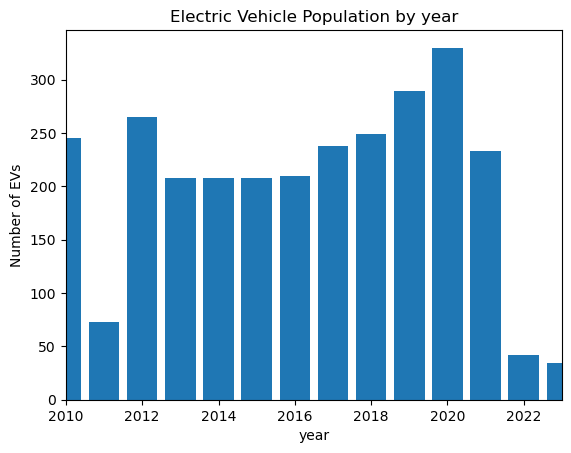

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
plt.bar(air_vechicl_final_df_resize['EV_year'],air_vechicl_final_df_resize['no_vehicle'])
plt.xlim(2010,2023)
plt.xlabel("year")
plt.ylabel("Number of EVs")
plt.title("Electric Vehicle Population by year")
plt.show()


air quility index by year

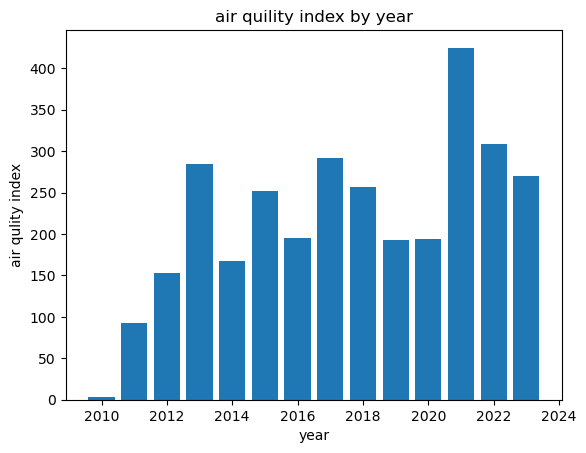

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
plt.bar(air_vechicl_final_df_resize['EV_year'],air_vechicl_final_df_resize['data_value'])
plt.xlabel("year")
plt.ylabel("air qulity index")
plt.title("air quility index by year")
plt.show()


Electric Vehicle Population by county

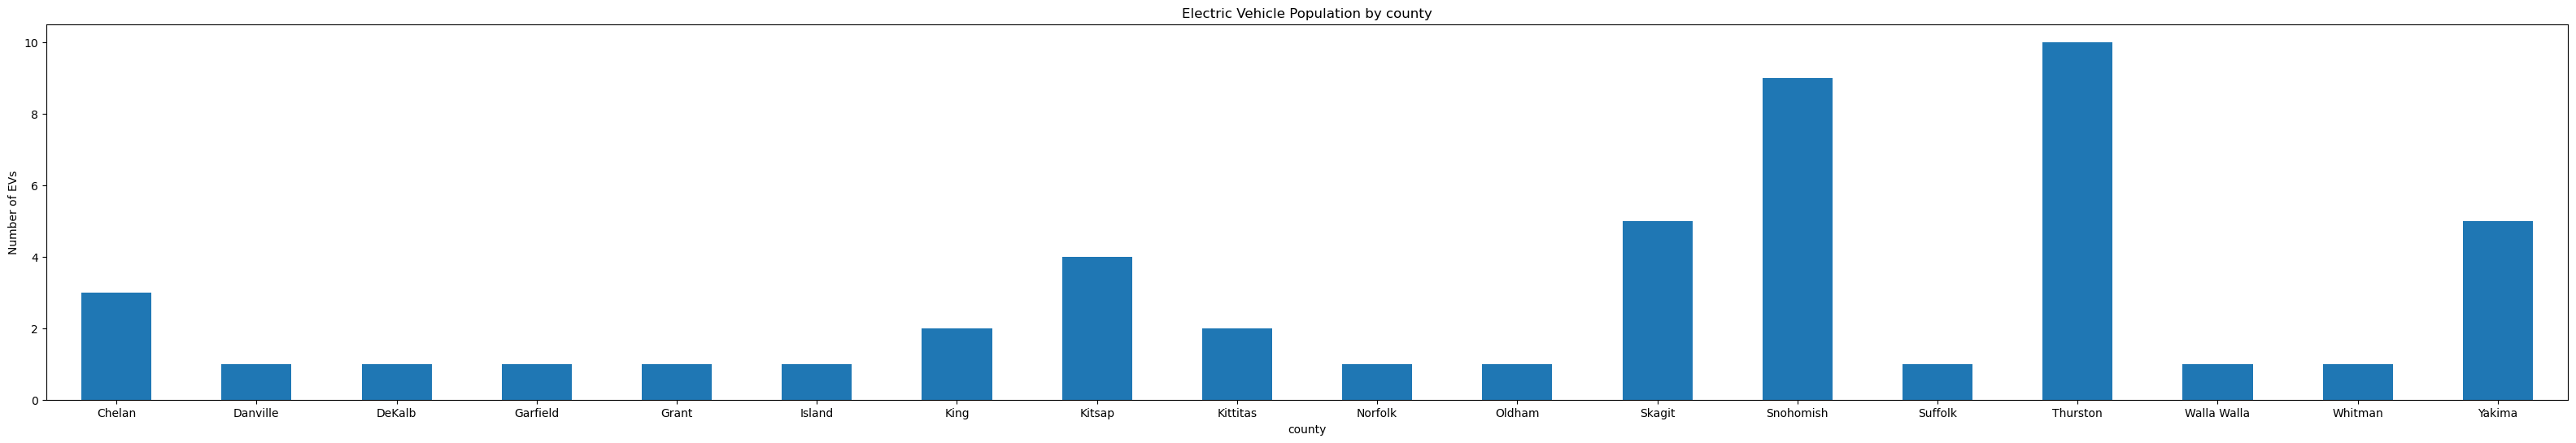

In [26]:
County_count = air_vechicl_final_df_resize[:50].groupby("County").size()
County_count.plot(kind="bar", rot=0,figsize=(40,6))
plt.xlabel("county")
plt.ylabel("Number of EVs")
plt.title("Electric Vehicle Population by county")
plt.show()

Electric Vehicle Population by Battery Type

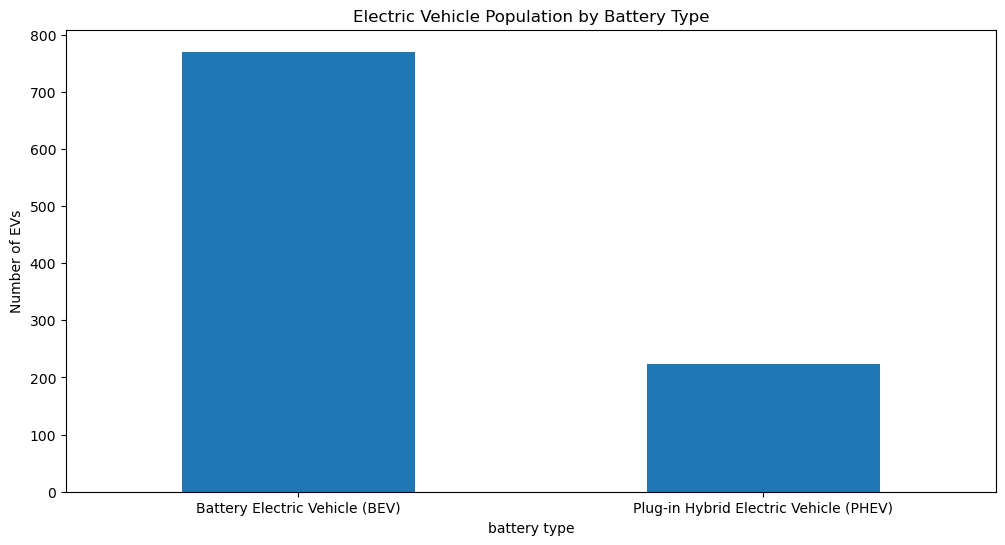

In [27]:
Electric_Vehicle_Type = air_vechicl_final_df_resize.groupby("Electric Vehicle Type").size()
Electric_Vehicle_Type.plot(kind="bar", rot=0 , figsize=(12,6))
plt.xlabel("battery type")
plt.ylabel("Number of EVs")
plt.title("Electric Vehicle Population by Battery Type")
plt.show()

In [28]:
print(air_vechicl_final_df_resize.columns)


Index(['index', 'unique_id', 'indicator_id', 'name', 'measure', 'measure_info',
       'geo_type_name', 'geo_join_id', 'geo_place_name', 'time_period',
       'start_date', 'data_value', 'date', 'year', 'VIN (1-10)', 'County',
       'City', 'State', 'Postal Code', 'EV_year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'no_vehicle',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


Electric Vehicle Population by Make and Clean Alternative Fuel Vehicle Eligibility

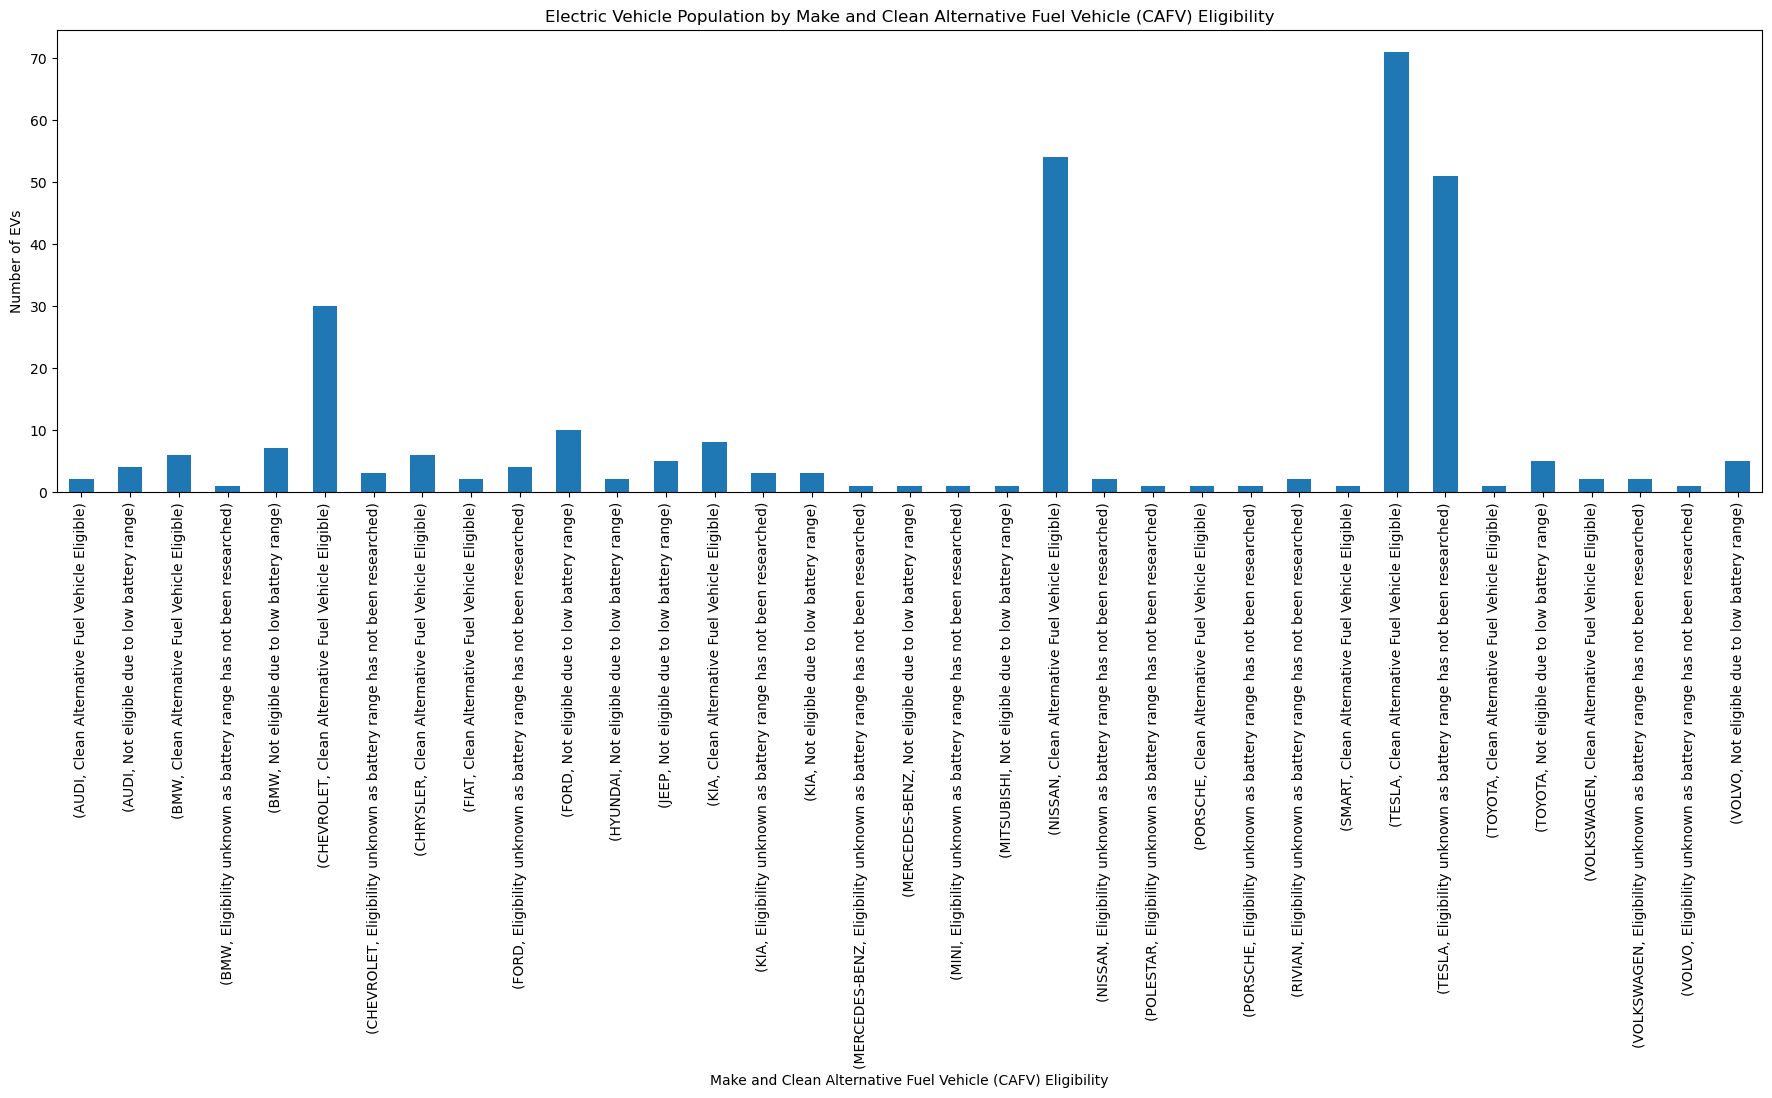

In [29]:
make_CAFVE_counts = air_vechicl_final_df_resize[:300].groupby(["Make", "Clean Alternative Fuel Vehicle (CAFV) Eligibility"]).size()
make_CAFVE_counts.plot(kind="bar", figsize=(22,6), rot=90)
plt.xlabel("Make and Clean Alternative Fuel Vehicle (CAFV) Eligibility")
plt.ylabel("Number of EVs")
plt.title("Electric Vehicle Population by Make and Clean Alternative Fuel Vehicle (CAFV) Eligibility")
plt.show()

Pie Chart of Vehicle Count by county

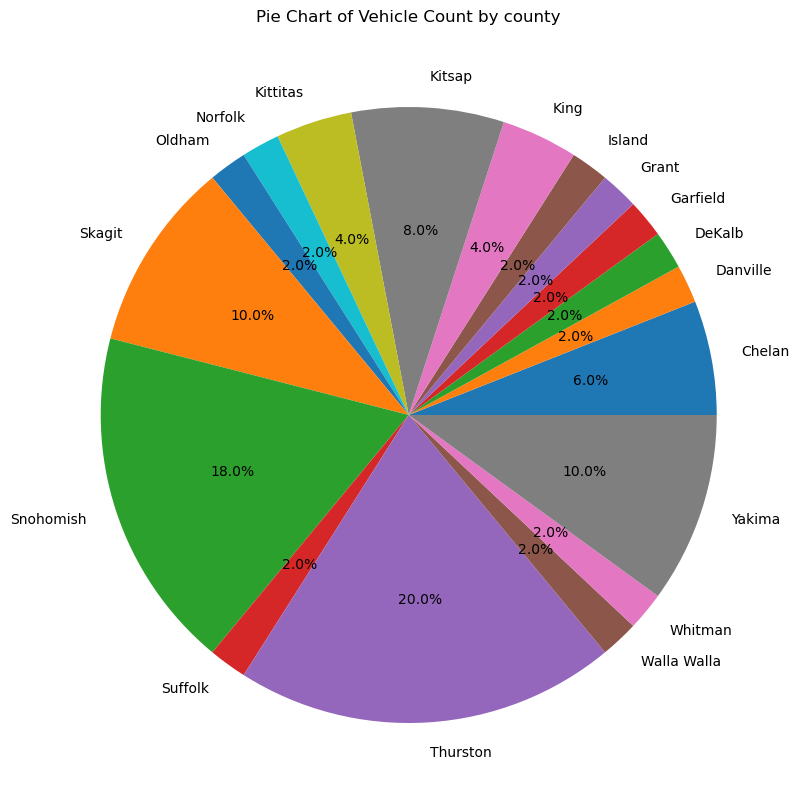

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

EV_counts = air_vechicl_final_df_resize[:50].groupby('County').size().reset_index(name='Count')
fig, ax = plt.subplots(figsize=(10, 10))
# Create a pie chart of vehicle count by fuel type
plt.pie(EV_counts['Count'], labels=EV_counts['County'], autopct='%1.1f%%')

plt.title("Pie Chart of Vehicle Count by county")
plt.show()

County VS data_value